In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# loading data 
df = pd.read_csv(r"fashionmnist/fashion-mnist_train.csv")
dft = pd.read_csv(r'fashionmnist/fashion-mnist_test.csv')

In [3]:
print("the shape of the traning set: {}\n".format(df.shape))
print("the shape of the traning set: {}".format(dft.shape))

the shape of the traning set: (60000, 785)

the shape of the traning set: (10000, 785)


So the Trainig data containd 60000 images with 784 (28 X 28) image and one columb of its lable

The Test data containd 1000 image of same dimention

In [4]:
df.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


# Features 
* Label: The Target variable.
* Pixels: The smallest suquare on the screen which makes up the image 

In [5]:
df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

Labels :

0 - T-shirt/top
1 - Trouser
2 - Pullover
3 - Dress
4 - Coat
5 - Sandals
6 - Shirt
7 - Sneaker
8 - Bag
9 - Ankle Boots

In [6]:
# checking for null values in the traing data set
df.isnull().any().sum()


0

In [7]:
# checking for null values in the test data set
dft.isnull().any().sum()

0

# Dataset  Visualization

In [8]:
clothing = {
    0 : "T-shirt/top",
    1 : "Trouser",
    2 : "Pullovers",
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'}
cloth_lable = ["T-shirt/top","Trouser","Pullovers",'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

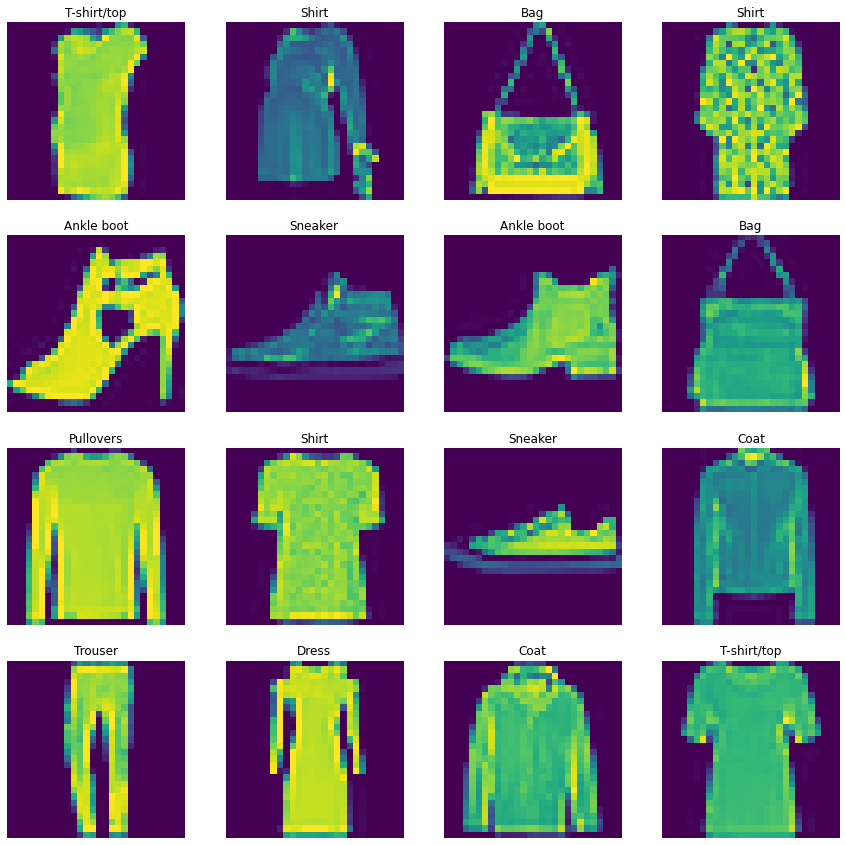

In [9]:
fig , axes = plt.subplots(4,4 , figsize = (15,15))

for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = df.drop("label", axis=1).values[index].reshape(28,28)
        cloths = df["label"][index]
        axe.imshow(img)
        axe.set_title(clothing[cloths])
        axe.set_axis_off()

# Data PreProcessing

In [10]:
# Setting Random Seeds for Reproducibilty.
seed = 66
np.random.seed(seed)

In [11]:
X = df.iloc[:3000,1:]
Y = df.iloc[:3000,0]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)

In [12]:
X.shape

(3000, 784)

In [13]:
Y.shape

(3000,)

In [14]:
x_train.shape

(2700, 784)

In [15]:
x_test.shape

(300, 784)

In [16]:
# You need to make sure that your Image is cast into double/float from int before you do this scaling 
# as you will most likely generate floating point numbers.
# And had it been int, the values will be truncated to zero.

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [17]:
dft = dft.astype("float32")/255

In [18]:
# predecting
Xp = dft.iloc[:1000,1:]
Yp = dft.iloc[:1000,0]

In [19]:
Xp.shape

(1000, 784)

In [20]:
Yp.shape

(1000,)

##  DT

In [22]:
model = DecisionTreeClassifier(random_state=0, max_depth=10)
model.fit(x_train, y_train.values.ravel())
y_pre = model.predict(x_test)
print("the accuracy_score : {}".format(accuracy_score(y_test, y_pre)))
print("the precision_score : {}".format(precision_score(y_test, y_pre, average='macro')))
print("the f1_score : {}".format(f1_score(y_test, y_pre, average='macro')))
print("the recall_score : {}".format(recall_score(y_test, y_pre, average='macro')))

the accuracy_score : 0.7266666666666667
the precision_score : 0.7333766513445867
the f1_score : 0.7248681200911957
the recall_score : 0.7266362433862434


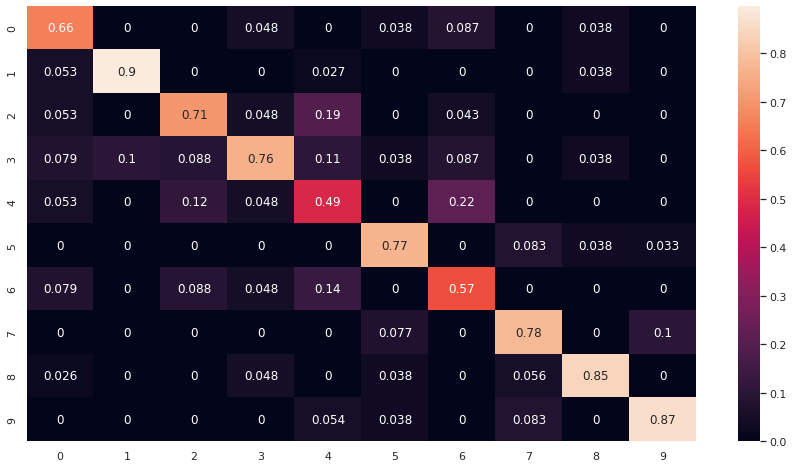

In [23]:
sns.set(rc = {'figure.figsize':(15,8)})# setting figure size

cfm = confusion_matrix(y_test, y_pre, normalize= 'pred')
sns.heatmap(cfm, annot = True)
plt.show()

## SGD

In [24]:
model = SGDClassifier(loss="hinge", max_iter=250)
model.fit(x_train, y_train.values.ravel())

y_pre = model.predict(x_test)

print("the accuracy_score : {}".format(accuracy_score(y_test, y_pre)))
print("the precision_score : {}".format(precision_score(y_test, y_pre, average='macro')))
print("the f1_score : {}".format(f1_score(y_test, y_pre, average='macro')))
print("the recall_score : {}".format(recall_score(y_test, y_pre, average='macro')))

the accuracy_score : 0.78
the precision_score : 0.7862478262478263
the f1_score : 0.780050287798615
the recall_score : 0.77753848003848


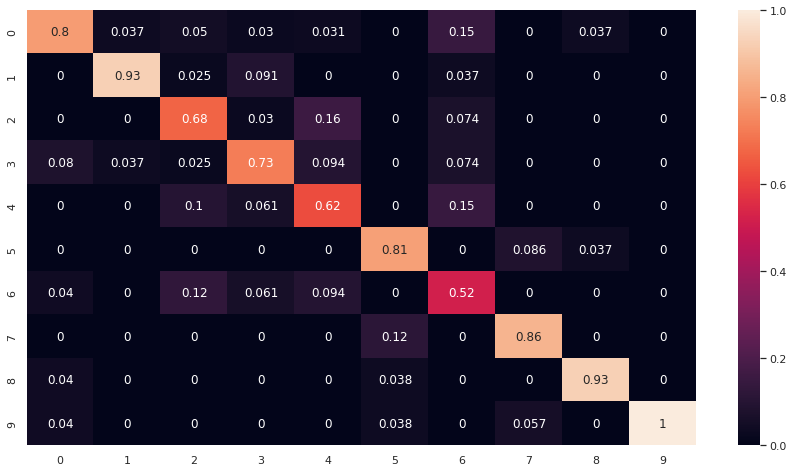

In [25]:
sns.set(rc = {'figure.figsize':(15,8)})# setting figure size

cfm = confusion_matrix(y_test, y_pre, normalize= 'pred')
sns.heatmap(cfm, annot = True)
plt.show()

## KNN 

In [26]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train.values.ravel())
y_pre = model.predict(x_test)

print("the accuracy_score : {}".format(accuracy_score(y_test, y_pre)))
print("the precision_score : {}".format(precision_score(y_test, y_pre, average='macro')))
print("the f1_score : {}".format(f1_score(y_test, y_pre, average='macro')))
print("the recall_score : {}".format(recall_score(y_test, y_pre, average='macro')))

the accuracy_score : 0.7733333333333333
the precision_score : 0.7840973027428136
the f1_score : 0.7716179285387147
the recall_score : 0.7675114237614238


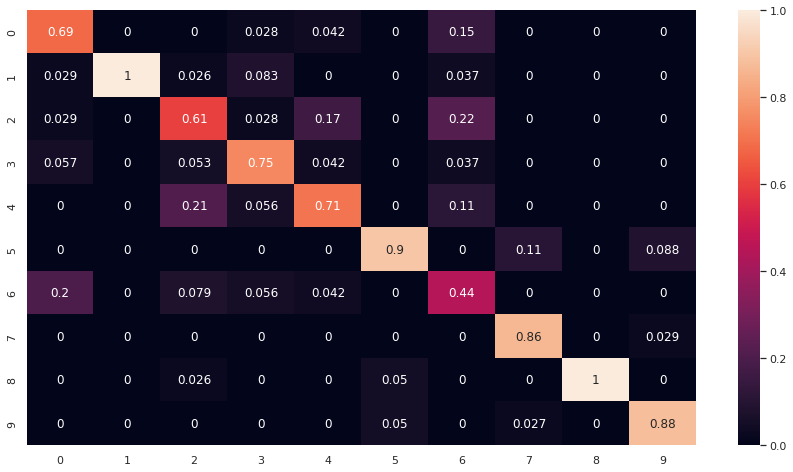

In [27]:
sns.set(rc = {'figure.figsize':(15,8)})# setting figure size

cfm = confusion_matrix(y_test, y_pre, normalize= 'pred')
sns.heatmap(cfm, annot = True)
plt.show()